In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('FakeNewsMaster-FS-nodup.csv')
list(features.columns)

['TF',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context',
 'Arts, Culture, Entertainment, Sports',
 'Conspiracy',
 'Business and Industrial',
 'economy, business and finance',
 'Religion and belief',
 'Law, Government and Politics',
 'Education',
 'Technology and Computing',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',
 'negemo',
 'social',
 'certain',
 'percept',
 'focuspast',
 'focuspresent',
 'time',
 'PERSON',
 'TIME',
 'ORG',
 'GPE']

In [3]:
features.fillna(0,inplace=True)

In [4]:
df= pd.read_pickle('FakeNewsMaster-dup.pkl')
list(df.columns)

['id',
 'url',
 'title',
 'tweet_id',
 'text',
 'date',
 'grammatical errors',
 'Label',
 'Clean_text',
 'TF_temp',
 'TF',
 'Bigram TF_temp',
 'Bigram TF',
 'No. of Stop_words',
 'Out of Context temp',
 'Out of Context',
 'Textrazor_category',
 'Textrazor_topic',
 'Topics_category',
 'Topics_topic',
 'score_category',
 'score_topic',
 'category_score_final',
 'category_list_final',
 'topic_score_final',
 'topic_list_final',
 'arts, culture and entertainment',
 'Conspiracy',
 'crime, law and justice',
 'Criticism of journalism',
 'Advertising video on demand',
 'computing and information technology',
 'agriculture',
 'energy and resource',
 'economy, business and finance',
 'Harassment',
 'Cyberspace',
 'religion and belief',
 'Politics and technology',
 'Social media',
 'science and technology',
 'Social epistemology',
 'social issue',
 'environmental issue',
 'Academia',
 'Attacks',
 'Feminism',
 'Sports',
 'Internet-Cyberspace',
 'Science',
 'Sixltr',
 'conj',
 'interrog',
 'number',

In [5]:
print(len(df))
print(len(features))

17934
17934


C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1    11014
0     3333
Name: Label, dtype: int64
11014
3333
6666
Random under-sampling:
1    3333
0    3333
Name: Label, dtype: int64


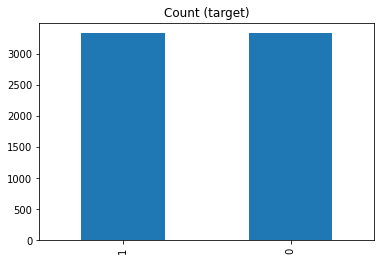

In [6]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
tokenizer= Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=" ")
df_train, df_test = train_test_split(df.loc[:,:], test_size=0.2, stratify= df.Label.values)
print(df_train.Label.value_counts())
df_class_1 = df_train.loc[df_train['Label']==1]
print(len(df_class_1))
df_class_0 =  df_train.loc[df_train['Label']==0]
print(len(df_class_0))
df_class_1_under = df_class_1.sample(len(df_class_0))
df_train_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print(len(df_train_under))

print('Random under-sampling:')
print(df_train_under.Label.value_counts())

df_train_under.Label.value_counts().plot(kind='bar', title='Count (target)');


In [7]:

sentences_train, sentences_test, y_train, y_test =df_train_under.text.values, df_test.text.values, df_train_under.Label.values, df_test.Label.values

tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [8]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

115171


In [9]:
from statistics import mean 
train_lengths= [len(x) for x in X_train]
mean(train_lengths)

596.8108310831083

In [10]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 600
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [11]:
from keras.models import Sequential
from keras import layers
from keras.models import Model
from keras.layers import  Activation, Dense, Dropout, Input, Embedding, Bidirectional, TimeDistributed, Flatten
from keras.layers.recurrent import GRU, SimpleRNN, LSTM
from keras.optimizers import RMSprop, Adam, SGD
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
embedding_dim = 50

def Lstm():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,128,input_length=maxlen)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def RNN():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,128,input_length=maxlen)(inputs)
    layer = SimpleRNN(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def Gru():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,128,input_length=maxlen)(inputs)
    layer = GRU(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

def BiLSTM():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,128,input_length=maxlen)(inputs)
    layer =  Bidirectional (LSTM (100,return_sequences=True,dropout=0.50),merge_mode='concat')(layer)
    layer = TimeDistributed(Dense(100,activation='relu'))(layer)
    layer = Flatten()(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [12]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm1 = Lstm()
lstm1.summary()
lstm1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm1.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm1.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an LSTM Model: 
Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 600, 128)          14741888  
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_____________________________

In [13]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm2 = Lstm()
lstm2.summary()
lstm2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm2.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm2.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an LSTM Model: 
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 600, 128)          14741888  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None,

In [14]:
#CREATE MODEL AND TRAIN
print("This is an LSTM Model: ")
lstm3 = Lstm()
lstm3.summary()
lstm3.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
lstm3.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = lstm3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = lstm3.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an LSTM Model: 
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 600, 128)          14741888  
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None,

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn1 = RNN()
rnn1.summary()
rnn1.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.005),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn1.fit(X_train,y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn1.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_38 (Embedding)     (None, 600, 128)          14741888  
_________________________________________________________________
simple_rnn_17 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_75 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None,

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ROC AUC: 0.524381
[[   0  833]
 [   0 2754]]


In [23]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn2 = RNN()
rnn2.summary()
rnn2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn2.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn2.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 600, 128)          14741888  
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None,

In [50]:
#CREATE MODEL AND TRAIN
print("This is an RNN Model: ")
rnn3 = RNN()
rnn3.summary()
rnn3.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.005),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
rnn3.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = rnn3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = rnn3.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an RNN Model: 
Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_39 (Embedding)     (None, 600, 128)          14741888  
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_77 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None,

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru1 = Gru()
gru1.summary()
gru1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru1.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru1.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 600, 128)          14741888  
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               98688     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 

In [20]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru2 = Gru()
gru2.summary()
gru2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru2.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru2.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 600, 128)          14741888  
_________________________________________________________________
gru_3 (GRU)                  (None, 128)               98688     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_17 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 

In [48]:
#CREATE MODEL AND TRAIN
print("This is an GRU Model: ")
gru3 = Gru()
gru3.summary()
gru3.compile(loss='binary_crossentropy',optimizer=SGD(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
gru3.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = gru3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = gru3.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an GRU Model: 
Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_37 (Embedding)     (None, 600, 128)          14741888  
_________________________________________________________________
gru_14 (GRU)                 (None, 128)               98688     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               33024     
_________________________________________________________________
activation_73 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None,

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM1 = BiLSTM()
BiLSTM1.summary()
BiLSTM1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM1.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM1.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM1.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_30 (Embedding)     (None, 600, 128)          14741888  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 600, 200)          183200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 600, 100)          20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 60000)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               15360256  
_________________________________________________________________
activation_59 (Acti

In [42]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM2 = BiLSTM()
BiLSTM2.summary()
BiLSTM2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM2.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM2.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM2.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_31 (Embedding)     (None, 600, 128)          14741888  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 600, 200)          183200    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 600, 100)          20100     
_________________________________________________________________
flatten_2 (Flatten)          (None, 60000)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               15360256  
_________________________________________________________________
activation_61 (Acti

In [44]:
#CREATE MODEL AND TRAIN
print("This is an Bi-Directional LSTM Model: ")
BiLSTM3 = BiLSTM()
BiLSTM3.summary()
BiLSTM3.compile(loss='binary_crossentropy',optimizer=SGD(lr=0.005),metrics=['accuracy'])

from keras.callbacks import EarlyStopping
BiLSTM3.fit(X_train,y_train,batch_size=64,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

accr = BiLSTM3.evaluate(X_test,y_test)

print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))




yhat_probs = BiLSTM3.predict(X_test, verbose=0)
yhat_classes=(yhat_probs>0.5)*(np.ones(yhat_probs.shape))

#METRICS
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes, average='weighted')
print(' Weighted Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='micro')
print(' Micro Precision: %f' % precision)
precision = precision_score(y_test, yhat_classes, average='macro')
print(' Macro Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes, average ='weighted')
print('Weighted Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='micro')
print('Micro Recall: %f' % recall)
recall = recall_score(y_test, yhat_classes, average ='macro')
print('Macro Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

This is an Bi-Directional LSTM Model: 
Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 600)               0         
_________________________________________________________________
embedding_33 (Embedding)     (None, 600, 128)          14741888  
_________________________________________________________________
bidirectional_4 (Bidirection (None, 600, 200)          183200    
_________________________________________________________________
time_distributed_4 (TimeDist (None, 600, 100)          20100     
_________________________________________________________________
flatten_4 (Flatten)          (None, 60000)             0         
_________________________________________________________________
FC1 (Dense)                  (None, 256)               15360256  
_________________________________________________________________
activation_65 (Acti

C:\Users\adith\anaconda3\envs\ANZ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


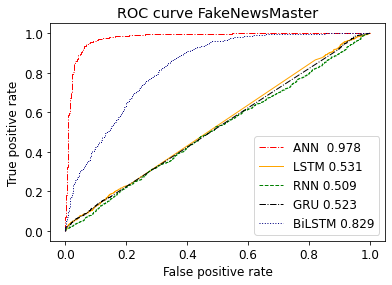

In [52]:
from sklearn import  metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import pickle
#LSTM
y_pred_lstm = lstm2.predict(X_test)
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_pred_lstm)
auc_lstm = auc(fpr_lstm, tpr_lstm)
#RNN
y_pred_rnn = rnn2.predict(X_test)
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)
#GRU
y_pred_gru = gru2.predict(X_test)
fpr_gru, tpr_gru, thresholds_gru = roc_curve(y_test, y_pred_gru)
auc_gru = auc(fpr_gru, tpr_gru)
#Bi-LSTM
y_pred_BiLSTM = BiLSTM1.predict(X_test)
fpr_BiLSTM, tpr_BiLSTM, thresholds_BiLSTM = roc_curve(y_test, y_pred_BiLSTM)
auc_BiLSTM = auc(fpr_BiLSTM, tpr_BiLSTM)

# plt.figure(1)
fig=pickle.load(open('ROC_FakeNewsMaster.pickle', 'rb'))
# ax = plt.subplot(111)
plt.plot(fpr_lstm, tpr_lstm, label='LSTM {:.3f}'.format(auc_lstm), color='orange', linestyle='-', linewidth=1)
plt.plot(fpr_rnn, tpr_rnn, label='RNN {:.3f}'.format(auc_rnn), color='green', linestyle='--', linewidth=1)
plt.plot(fpr_gru, tpr_gru, label='GRU {:.3f}'.format(auc_gru), color='black', linestyle='-.', linewidth=1)
plt.plot(fpr_BiLSTM, tpr_BiLSTM, label='BiLSTM {:.3f}'.format(auc_BiLSTM), color='navy', linestyle=':', linewidth=1)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve FakeNewsMaster')
plt.legend(loc='best')
# pickle.dump(fig, open('ROC_Liar-Liar.pickle', 'wb'))
plt.savefig('ROC_FakeNewsMaster.eps')
plt.show()



In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

def clean_review(review_text):
    review_text=re.sub(r'http\S+', ' ',review_text) #Removing url
    review_text=re.sub(r'[^a-zA-Z]', ' ',review_text) #Removing Numbers and Punctuation
    review_text= str(review_text).lower()   #Lower casing the sentence
    review_text= word_tokenize(review_text)    #Tokenization
    review_text = [item for item in review_text if item not in stop_words]  # Removing stop_words
    review_text = [lemma.lemmatize(word=w, pos= 'v') for w in review_text]       #Lemmatization
    review_text= [i for i in review_text if len(i)>3]     #Removing small length words
    review_text = ' '.join(review_text)     #converting back to string
    return review_text
    

In [8]:
df.head()

,id,url,title,tweet_id,text,date,grammatical errors,Label,Clean_text,TF_temp,...,social,certain,percept,focuspast,focuspresent,time,"Arts, Culture, Entertainment, Sports",Business and Industrial,"Law, Government and Politics",religion & social epistemology
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,Congratulations might be in order for Miley Cy...,2018-06-22 15:58:20+01:00,NaN,0,congratulations might order miley cyrus liam h...,0.928365,...,16.61,0.48,3.67,6.55,5.59,5.75,0.4508,0.0,0.5712,0.0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,Paris Jackson and Cara Delevingne were spotted...,2018-05-05 00:00:00,NaN,0,paris jackson cara delevingne spotted town new...,0.96704,...,12.79,0.29,3.49,4.36,9.01,6.98,0.4508,0.0,0.0000,0.0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,Thousands are taking the streets to protest Pr...,2017-04-15 21:25:01+00:00,NaN,0,thousands taking streets protest president don...,0.96503,...,12.57,1.75,1.75,3.22,5.56,6.14,0.0000,0.0,0.4880,0.0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,We'd venture to say that Cindy Crawford's daug...,2016-03-18 20:27:55+00:00,NaN,0,'d venture say cindy crawford 's daughter kaia...,0.941279,...,14.02,0.85,3.82,6.23,3.54,5.95,0.0000,0.0,0.0000,0.0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,Follow Us on TwitterOscar nominations for the ...,2018-01-23 13:19:57+00:00,NaN,0,follow us twitteroscar nominations 90th annual...,0.932941,...,4.49,0.35,2.07,0.81,1.38,2.19,0.4508,0.0,0.0000,0.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4166


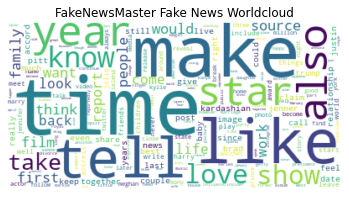

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df['CleanReview']=df['text'].apply(clean_review)
text=""
print(len(df[df['Label']==0]))
for sentence in list(df[df['Label']==0]['CleanReview']):
    text= text + ' ' + sentence
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
# text=text.lower()
# for i in filters:
#     text=text.replace(i, ' ')
text_tokens = word_tokenize(text)
# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

wordfreq = {}
for word in text_tokens:
    wordfreq[word] = wordfreq.setdefault(word, 0) + 1
    


wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=wordfreq)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('FakeNewsMaster Fake News Worldcloud')
fig = plt.gcf()
fig.savefig('FakeNewsMaster-Fake.eps',transparent=False, bbox_inches='tight', dpi=300)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


13768


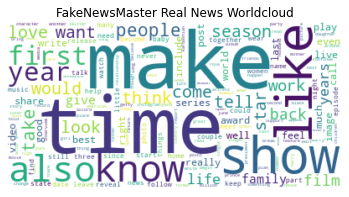

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df['CleanReview']=df['text'].apply(clean_review)
text=""
print(len(df[df['Label']==1]))
for sentence in list(df[df['Label']==1]['CleanReview']):
    text= text + ' ' + sentence
# filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
# text=text.lower()
# for i in filters:
#     text=text.replace(i, ' ')
text_tokens = word_tokenize(text)
# tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

wordfreq = {}
for word in text_tokens:
    wordfreq[word] = wordfreq.setdefault(word, 0) + 1
    


wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=wordfreq)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('FakeNewsMaster Real News Worldcloud')
fig = plt.gcf()
fig.savefig('FakeNewsMaster-Real.eps',transparent=False, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize
from itertools import combinations
from collections import Counter
df['CleanReview']=df['text'].apply(clean_review)
sentences = [i for i in df.CleanReview]
vocab = set(word_tokenize(' '.join(sentences)))
print('Vocabulary:\n',vocab,'\n')
print('Vocabulary:\n',len(vocab),'\n')
token_sent_list = [word_tokenize(sen) for sen in sentences]
print('Each sentence in token form:\n',token_sent_list[:10],'\n')

co_occ = {ii:Counter({jj:0 for jj in vocab if jj!=ii}) for ii in vocab}
k=2

for sen in token_sent_list:
    for ii in range(len(sen)):
        if ii < k:
            c = Counter(sen[0:ii+k+1])
            del c[sen[ii]]
            co_occ[sen[ii]] = co_occ[sen[ii]] + c
        elif ii > len(sen)-(k+1):
            c = Counter(sen[ii-k::])
            del c[sen[ii]]
            co_occ[sen[ii]] = co_occ[sen[ii]] + c
        else:
            c = Counter(sen[ii-k:ii+k+1])
            del c[sen[ii]]
            co_occ[sen[ii]] = co_occ[sen[ii]] + c



In [ ]:
# Having final matrix in dict form lets you convert it to different python data structures
co_occ = {ii:co_occ[ii] for ii in vocab}
display(co_occ)

In [54]:
from nltk.tokenize import word_tokenize
from itertools import combinations
from collections import Counter
df['CleanReview']=df['text'].apply(clean_review)
sentences = [i for i in df.CleanReview]
vocab = set(word_tokenize(' '.join(sentences)))
# print('Vocabulary:\n',vocab,'\n')
print('Vocabulary:\n',len(vocab),'\n')
token_sent_list = [word_tokenize(sen) for sen in sentences]
print('Each sentence in token form:\n',token_sent_list[:10],'\n')
l_unique = list(set((' '.join(sentences)).split(' ')))
mat = np.zeros((len(l_unique), len(l_unique)))

nei = []
nei_size = 3

for sentence in sentences:
    words = sentence.split(' ')

    for i, _ in enumerate(words):
        nei.append(words[i])

        if len(nei) > (nei_size * 2) + 1:
            nei.pop(0)

        pos = int(len(nei) / 2)
        for j, _ in enumerate(nei):
            if nei[j]  in l_unique and words[i] in l_unique:
                mat[l_unique.index(nei[j]), l_unique.index(words[i])] += 1

mat = pd.DataFrame(mat)
mat.index = l_unique
mat.columns = l_unique
display(mat)


Vocabulary:
 125534 

Each sentence in token form:
 [['congratulations', 'might', 'order', 'miley', 'cyrus', 'liam', 'hemsworth', 'accord', 'report', 'insiders', 'tell', 'life', 'style', 'magazine', 'pair', 'secretly', 'hippie', 'style', 'ceremony', 'malibu', 'california', 'mansion', 'actually', 'deed', 'real', 'time', 'miley', 'liam', 'recently', 'secret', 'malibu', 'mansion', 'source', 'miley', 'cyrus', 'liam', 'hemsworth', 'secretly', 'marry', 'home', 'malibu', 'accord', 'report', 'neighbor', 'clue', 'around', 'everywhere', 'hippie', 'style', 'source', 'continue', 'wear', 'white', 'flowey', 'dress', 'animals', 'roam', 'around', 'crazy', 'food', 'vegetarian', 'organic', 'anonymous', 'informant', 'express', 'love', 'best', 'friend', 'want', 'grow', 'together', 'house', 'life', 'style', 'report', 'rather', 'invite', 'someone', 'perform', 'miley', 'honor', 'sing', 'rendition', 'godmother', 'dolly', 'parton', 'song', 'islands', 'stream', 'wayne', 'coyne', 'flame', 'lips', 'also', 'perfor

MemoryError: 

In [ ]:
mat.to_csv('FakeNewsMaster_Coherence_matrix.csv') 